In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import csv




In [3]:
df = pd.read_excel("E:\ML ASSIGNMENTS\ASSIGNMENT 1\Concrete_Data.xls")
print(f"Shape of given dataset is {df.shape}")
df

Shape of given dataset is (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [20]:
###SPLITTING INPUT FEATURES AND TARGETS
Y = df.iloc[:,8]
X=df.iloc[:,:8]
print(f'Number of features in the given dataset is {X.shape[1]}')
X = np.array(X)




Number of features in the given dataset is 8


Q.1)Ans: SPLITTING THE DATA INTO TRAINING AND TEST DATA IN THE RATIO OF 70:30

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.30,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
#print(y_train.shape)
print(f'The shape of test data is:{x_test.shape}')
#print(y_test.shape)


The shape of training data is:(721, 8)
The shape of test data is:(309, 8)


Q.2)Ans: FITTING A LINEAR REGRESSION MODEL WITH 'MEAN SQUARE ERROR' AND 'R-SQUARE VALUE' AS EVALUATION METRICS

In [22]:
scaler_linear = StandardScaler()
x_train_scaled = scaler_linear.fit_transform(x_train)
print(f'The mean value of each input feature is:{scaler_linear.mean_}')
print(f'The standard deviation value of each feature is:{scaler_linear.scale_}')


The mean value of each input feature is:[280.56069348  70.15368932  54.20104022 181.39069348   6.00807351
 972.77873786 778.39760055  45.37170596]
The standard deviation value of each feature is:[104.29414791  83.55250746  64.38571356  21.02764978   5.86100246
  78.22807817  78.47232672  62.02031324]


In [7]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
yhat_train = model.predict(x_train_scaled)


In [30]:
x_test_scaled = scaler_linear.transform(x_test)
yhat_test = model.predict(x_test_scaled)

Q.3)Ans. predict the value of ‘Concrete compressive strength’ for the given Test data in the submission.csv file

In [28]:
outputdf = pd.DataFrame({'y_test':y_test,'yhat_test':yhat_test})
outputdf
outputdf.to_csv("E:\ML ASSIGNMENTS\ASSIGNMENT 1\submission.csv")

Q.4)Ans. a) Mean Squared error and R-squared value for training data and test
         data respectively.
         b) Scatter plot for ytrue against ypredicted for training and test data respectively.


In [31]:
#Training data
mse_train = mean_squared_error(y_train,yhat_train)
print(f'Mean squared error of training data is:{mse_train}')
cost_train = mean_squared_error(y_train,yhat_train)/2
print(f'Cost function value of training data is:{cost_train}')
r2score_train = r2_score(y_train,yhat_train)
print(f'R square value of training data is:{r2score_train}')

#Test data
mse_test = mean_squared_error(y_test,yhat_test)
print(f'Mean squared error of test data is:{mse_test}')
cost_test = mean_squared_error(y_test,yhat_test)/2
print(f'Cost function value of test data is:{cost_test}')
r2score_test = r2_score(y_test,yhat_test)
print(f'R square value of test data is:{r2score_test}')

Mean squared error of training data is:102.54784585315686
Cost function value of training data is:51.27392292657843
R square value of training data is:0.6411304739211956
Mean squared error of test data is:113.64938121261191
Cost function value of test data is:56.82469060630596
R square value of test data is:0.5664015776307874


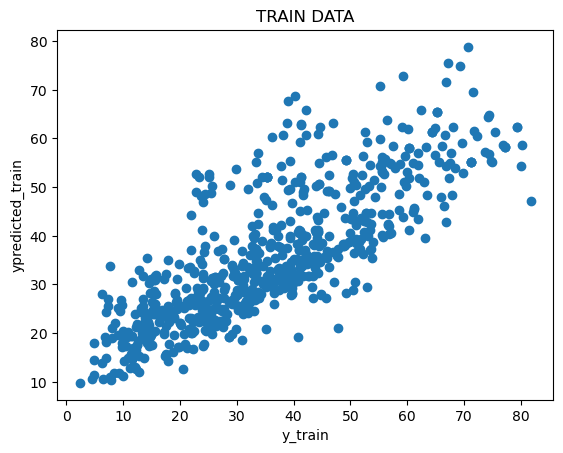

In [13]:
plt.scatter(y_train,yhat_train)
plt.xlabel('y_train')
plt.ylabel('ypredicted_train')
plt.title('TRAIN DATA')
plt.show()

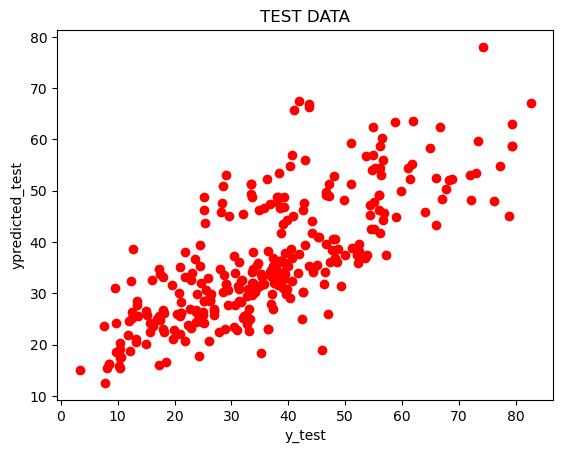

In [14]:
plt.scatter(y_test,yhat_test,color='Red')
plt.xlabel('y_test')
plt.ylabel('ypredicted_test')
plt.title('TEST DATA')
plt.show()